## Standardization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\smc\.cache\kagglehub\datasets\ninzaami\loan-predication\versions\1


In [2]:
files=os.listdir(path)
files

['train_u6lujuX_CVtuZ9i (1).csv']

In [3]:
df=pd.read_csv(os.path.join(path, 'train_u6lujuX_CVtuZ9i (1).csv'))

In [4]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# df['LoanAmount'].mode()[0]

In [7]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

C:\Users\smc\AppData\Local\Temp\ipykernel_8360\2424903021.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\smc\AppData\Local\Temp\ipykernel_8360\3669599957.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


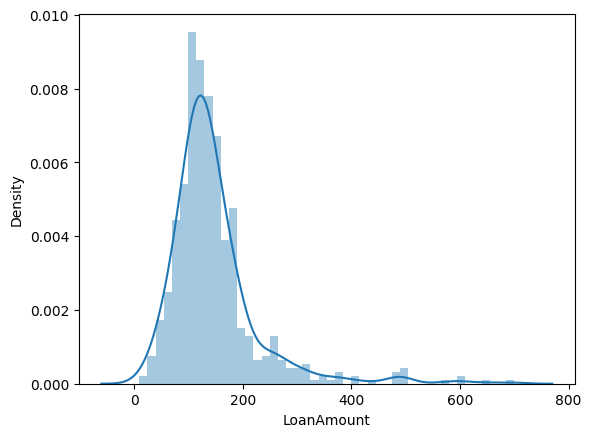

In [10]:
sns.distplot(df['LoanAmount'])
plt.show()

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,84.037468,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
from sklearn.preprocessing import StandardScaler

In [33]:
scale=StandardScaler()
ss=scale.fit_transform(df[['LoanAmount']])

In [34]:
df['LoanAmount_ss']=pd.DataFrame(scale.fit_transform(df[['LoanAmount']]))

In [35]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,-0.219273
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,-0.957641


In [36]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_ss
count,614.000000,614.000000,614.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,5.786179e-18
std,6109.041673,2926.248369,84.037468,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-1.636463e+00
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,-5.497524e-01
50%,3812.500000,1188.500000,129.000000,360.00000,1.000000,-2.073642e-01
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,2.183882e-01
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,6.592764e+00


C:\Users\smc\AppData\Local\Temp\ipykernel_8360\1552455849.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount_ss'])
C:\Users\smc\AppData\Local\Temp\ipykernel_8360\1552455849.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<function matplotlib.pyplot.show(close=None, block=None)>

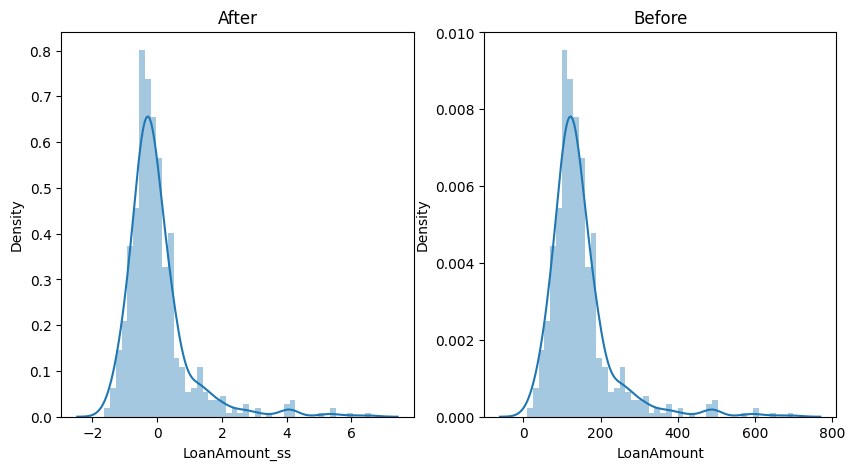

In [37]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['LoanAmount_ss'])
plt.title('After')
plt.subplot(1,2,2)
sns.distplot(df['LoanAmount'])
plt.title('Before')
plt.show